# Traffic Analysis on Sao Paulo Brazil data set

Dataset:
Traffic Data collected between 7:00 and 20:00 every 30 minutes for 5 days in the city of São Paulo, Brazil. Recording the time, identified incidents and the slowness in traffic recorded.

Note: 
Due to the fact that the database has few records, the results are subject to chance. However, it is possible to stipulate some findings

In [1]:
# =====   Importing Libraries   ===== #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Data Analysis

In [2]:
# Reading the file
# Path of dataset to be inserted here
base = pd.read_csv(r'C:\Users\dheer\Desktop\DS Assignment\Dataset\traffic.csv', sep=";")

attributes = base.columns.tolist()
del(attributes[len(attributes)-1], attributes[0])

base.insert(0, 'Day', np.repeat([1,2,3,4,5],27))

dict_hours = {1: "7:00", 2: "7:30", 3: "8:00", 4: "8:30", 5: "9:00", 6: "9:30", 7: "10:00", 8: "10:30",
                 9: "11:00", 10: "11:30", 11: "12:00", 12: "12:30", 13: "13:00", 14: "13:30", 15: "14:00",
                 16: "14:30", 17: "15:00", 18: "15:30", 19: "16:00", 20: "16:30", 21: "17:00", 22: "17:30",
                 23: "18:00", 24: "18:30", 25: "19:00", 26: "19:30", 27: "20:00"}


In [3]:
#Total of each incident
summation = []
for i in range(len(attributes)):
    summation.append(base[attributes[i]].sum())
    
# Total of each incident per day
nday = 5
day_summary = pd.DataFrame(columns=attributes)
day_summary.insert(0, "Day", "Nan")

for n in range(1, nday+1):
    day_sum = []
    for i in range(len(attributes)):
        day_sum.append(base[attributes[i]].loc[base.Day == n].sum())
    df = pd.DataFrame([day_sum], columns=attributes)
    df.insert(0, "Day", n)
    day_summary = day_summary.append(df, ignore_index=True)

In [4]:
day_summary

,Day,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
0,1,3,8,0,3,1,0,0,0,0,0,0,0,0,1,0,0
1,2,14,26,0,14,2,1,0,0,1,0,0,0,3,1,1,0
2,3,8,32,1,17,3,0,0,0,12,1,6,1,2,1,9,1
3,4,11,26,0,7,5,0,1,1,2,0,10,5,9,2,2,1
4,5,10,26,3,16,5,0,0,0,1,0,0,1,17,1,5,0


Checking the time at which the traffic is slowest

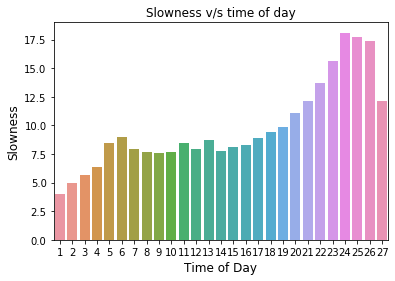

In [5]:
groupByHour = base.groupby(['Hour (Coded)'])

# Create dataframe with average values grouped by time
traffic_Hour = pd.DataFrame(groupByHour['Slowness in traffic (%)'].median().reset_index(name = 'Slowness in traffic (%)'))

sns.barplot(x="Hour (Coded)", y="Slowness in traffic (%)", data=traffic_Hour);

plt.title('Slowness v/s time of day')
plt.ylabel('Slowness', fontsize=12)
plt.xlabel('Time of Day', fontsize=12)
plt.show()

It can be clearly seen from graph that Traffic is slower at the end of the day, from 6 pm to 7:30 pm

Checking the factors that cause the most slowness

In [6]:
data = base
data['Slowness in traffic (%)'] = data['Slowness in traffic (%)'].astype(float)
data = data.sort_values(by='Slowness in traffic (%)')[-20:]
#Remove time column and column with slowness percentage
dataProcess = data.drop('Slowness in traffic (%)', axis=1)
dataProcess = dataProcess.drop('Hour (Coded)', axis=1)

In [7]:
# Function to sum the occurrence number for each incident type
def createDataFrame (dt):
    values = []
    keysWithValues = []
    keys = dt.keys()
    
    for i in range(0, len(keys)):
        value = dt[keys[i]].sum()
        if (value > 0):
            values.append(value)
            keysWithValues.append(keys[i])
    return (keysWithValues, values)

In [8]:
keys, values = createDataFrame(dataProcess)
df = pd.DataFrame([values], columns=keys)

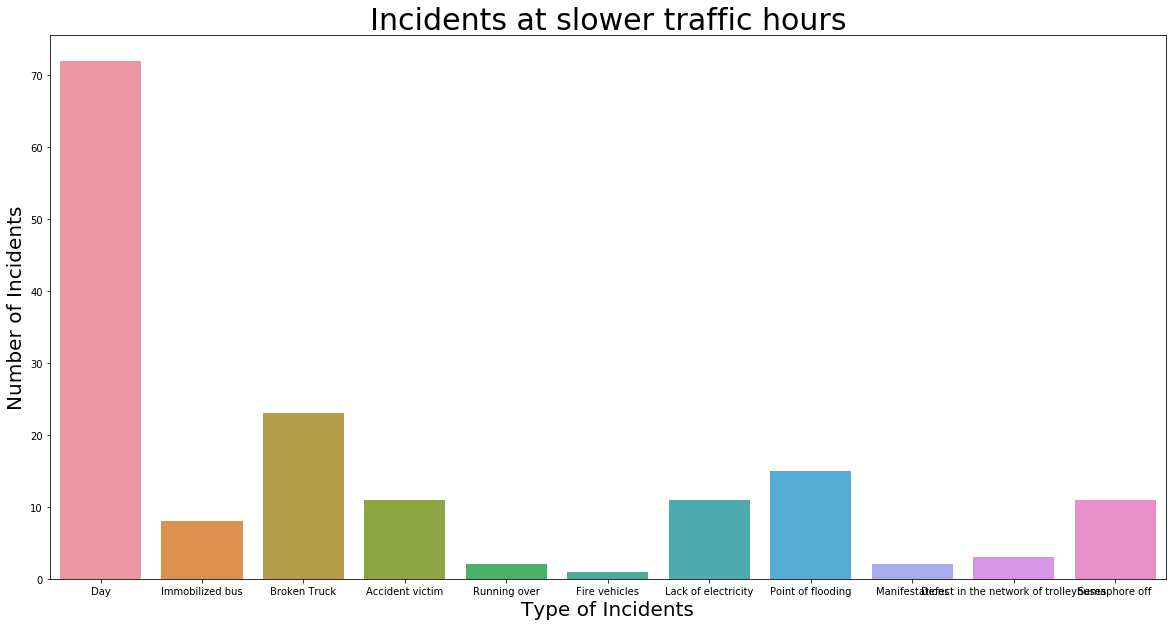

In [9]:
plt.figure(figsize=(20,10))

sns.barplot(data=df);

plt.title('Incidents at slower traffic hours', fontsize=30)
plt.ylabel('Number of Incidents', fontsize=20)
plt.xlabel('Type of Incidents', fontsize=20)
plt.show()

In [10]:
# Graph plot for incident amount per day
def plot_graph(day, data):
    if day == 0:
        plt.barh(attributes, data, color='orange')
        plt.title("Total")
    else:
        plt.barh(attributes, data.loc[data.Day == day].values[0][1:])
        plt.title("Day {}".format(day))
    plt.grid(axis='x', linewidth='0.5')

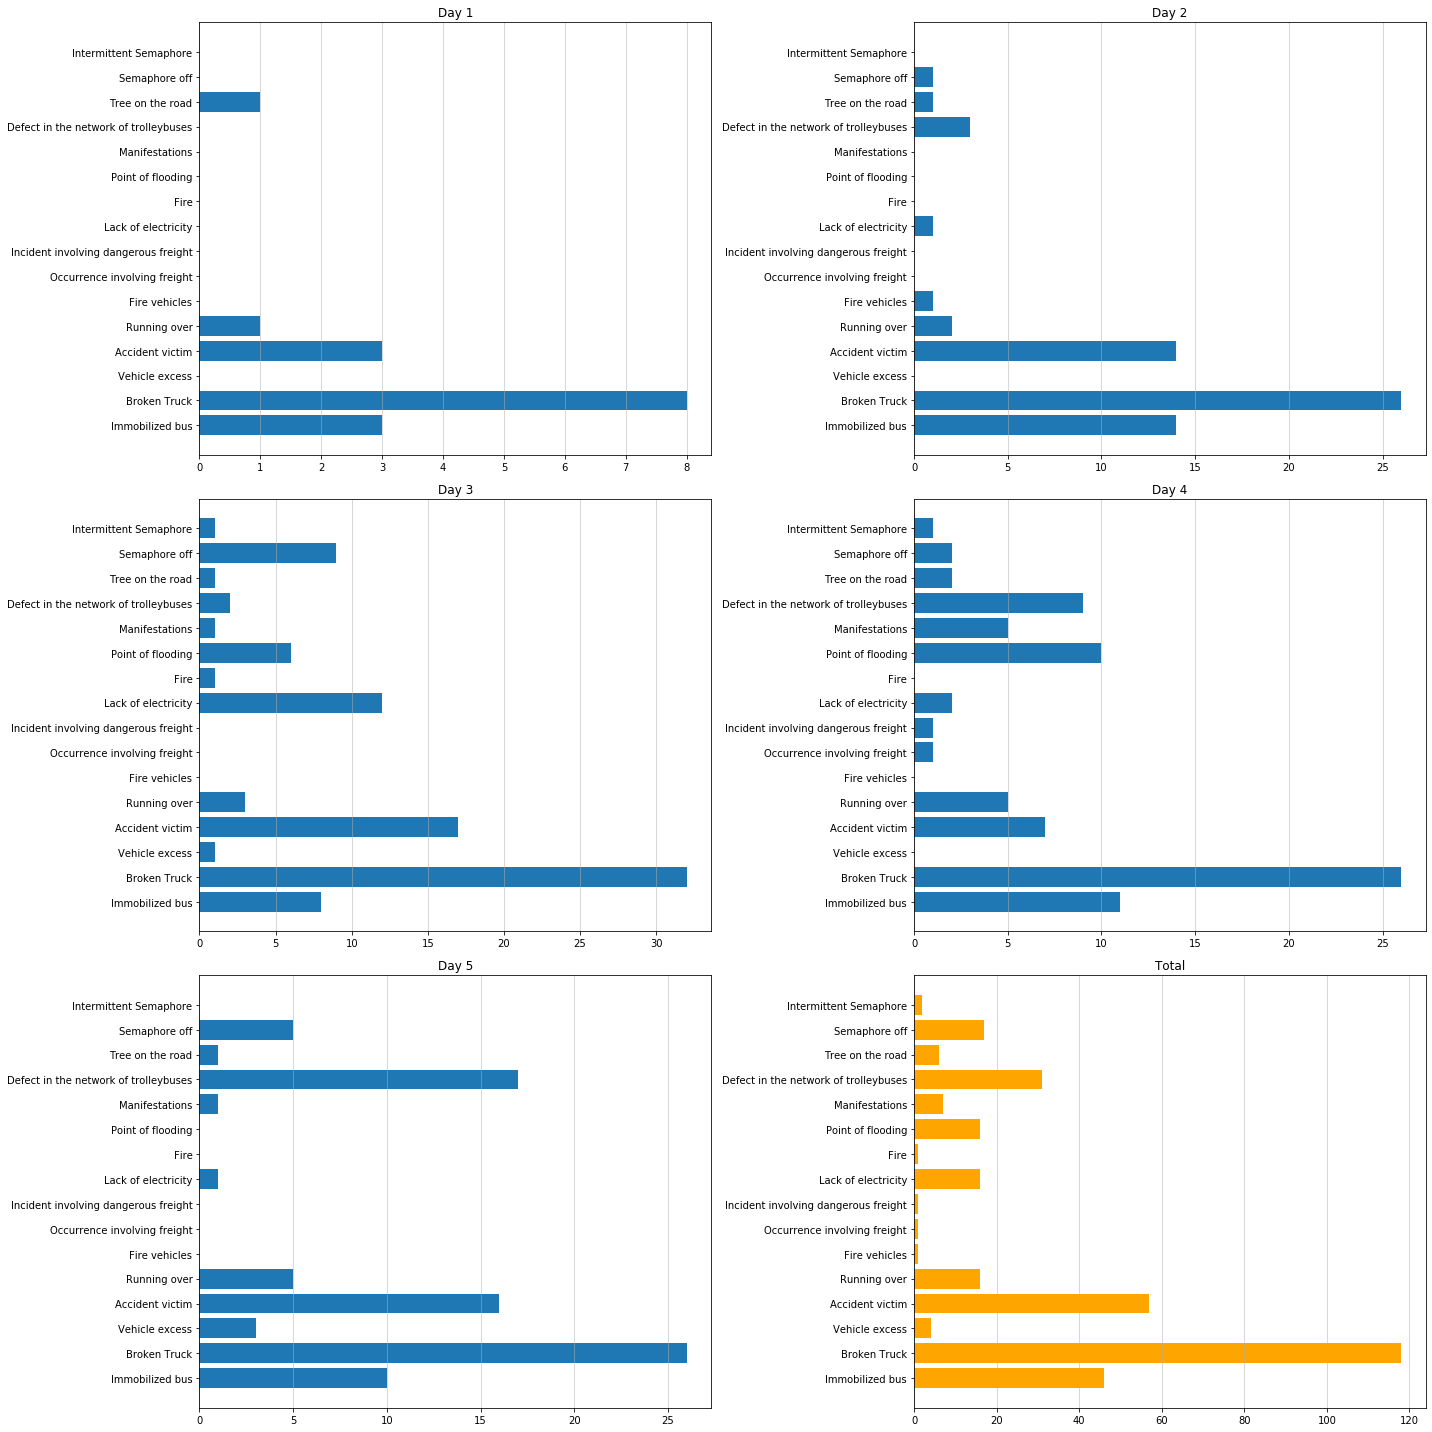

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plot_graph(1, day_summary)
plt.subplot(3,2,2)
plot_graph(2, day_summary)
plt.subplot(3,2,3)
plot_graph(3, day_summary)
plt.subplot(3,2,4)
plot_graph(4, day_summary)
plt.subplot(3,2,5)
plot_graph(5, day_summary)
plt.subplot(3,2,6)
plot_graph(0, summation)

plt.tight_layout()

In [12]:
# ===== Analysis of the Time and slowness in Traffic ===== #
Incident_base = base.iloc[:]
for n in range(len(Incident_base)-1, -1, -1):
    if Incident_base.iloc[n, 2:18].values.sum() != 0:
        Incident_base.drop(n, inplace=True)

average_time = []
average_incidents = []
for n in range(1, 28):
    average_time.append(base["Slowness in traffic (%)"].loc[base["Hour (Coded)"] == n].mean())
    average_incidents.append(Incident_base["Slowness in traffic (%)"].loc[Incident_base["Hour (Coded)"] == n].mean())

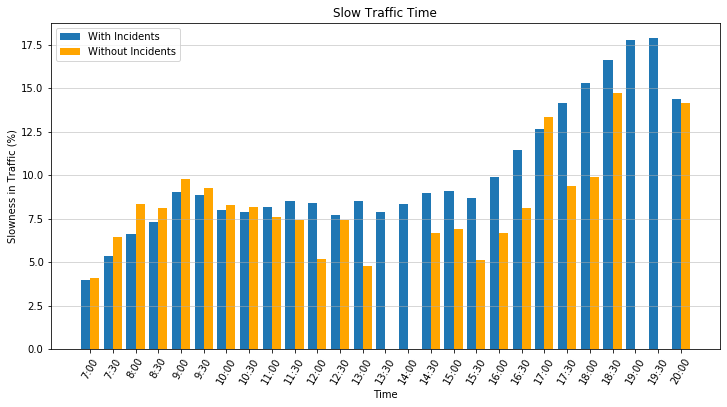

In [13]:
plt.figure(figsize=(12,6))
plt.bar(base["Hour (Coded)"].unique(), average_time,
             label="With Incidents", width=0.4, align="center")
plt.bar(base["Hour (Coded)"].unique()+0.4, average_incidents,
             label="Without Incidents", color="orange", width=0.4)
plt.legend()
plt.title("Slow Traffic Time")
plt.xlabel("Time")
plt.ylabel("Slowness in Traffic (%)")
plt.xticks(base["Hour (Coded)"].unique()+0.2, dict_hours.values(), rotation=60)
plt.grid(axis='y', linewidth="0.5")

In [14]:
# ===== Incident Time Analysis ===== #
incident_time = base.groupby("Hour (Coded)").mean()
incident_sum = base.groupby("Hour (Coded)").sum()
time_slowness = incident_time["Slowness in traffic (%)"]

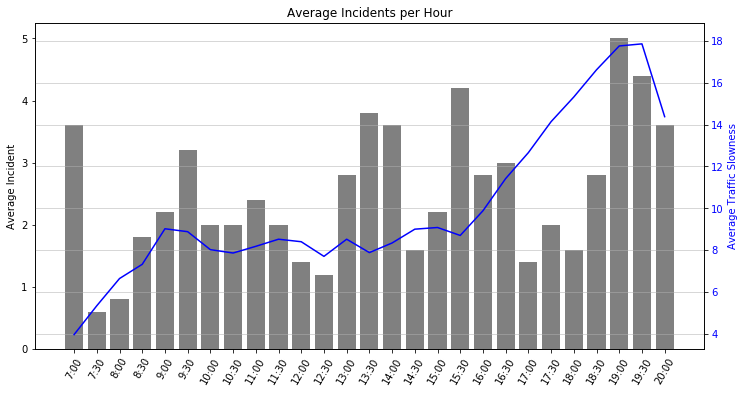

In [15]:
fig, ax1 = plt.subplots(figsize=(12,6))
for n in range(len(dict_hours)):
    ax1.bar(dict_hours[n+1], incident_time.iloc[n, 1:17].sum(), color="grey")
ax1.set_ylabel('Average Incident')
ax2 = ax1.twinx()
ax2.plot(list(dict_hours.values()), time_slowness, color='b')
plt.ylim(top=max(time_slowness)+1)
ax2.set_ylabel('Average Traffic Slowness', color='b')
for lb in ax2.get_yticklabels():
    lb.set_color('b')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
plt.title("Average Incidents per Hour")
plt.grid(axis='y', linewidth="0.5")

In [16]:
# Plots the amount of a given incident per time
def plot_incident(incident):
    incid = incident_sum[incident]
    
    plt.figure(figsize=(12,5))
    for n in range(len(dict_hours)):
        plt.bar(dict_hours[n+1],  incid[n+1], color="grey")
    plt.xticks(rotation=60)
    plt.yticks(list(range(min(incid), max(incid)+1)))
    plt.grid(axis='y', linewidth="0.5")
    plt.title("Number of incidents per hour".format(incident))

 Incident Options:
 Immobilized bus
 Broken Truck
 Vehicle excess
 Accident victim
 Running over
 Fire vehicles
 Occurrence involving freight
 Incident involving dangerous freight
 Lack of electricity
 Fire
 Point of flooding
 Manifestations
 Defect in the network of trolleybuses
 Tree on the road
 Semaphore off
 Intermittent Semaphore


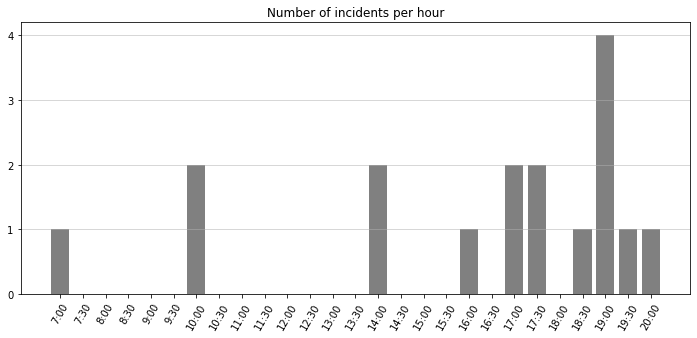

In [17]:
print(" Incident Options:", *attributes, sep='\n ')
plot_incident("Semaphore off")

In [18]:
# Plots the number of all Incidents in a given Time
def plot_hour(hour):
    for k, v in dict_hours.items():
        if v == hour:
            h = k
    plt.figure(figsize=(12,5))
    plt.barh(attributes, incident_sum.iloc[h-1, 1:17].values, color="grey")
    plt.xlabel("Number of Incidents")
    plt.title("Hour {}".format(hour))
    plt.grid(axis='x', linewidth="0.5")

Time Options:	7:00	7:30	8:00	8:30	9:00	9:30	10:00	10:30	11:00	11:30	12:00	12:30	13:00	13:30	14:00	14:30	15:00	15:30	16:00	16:30	17:00	17:30	18:00	18:30	19:00	19:30	20:00


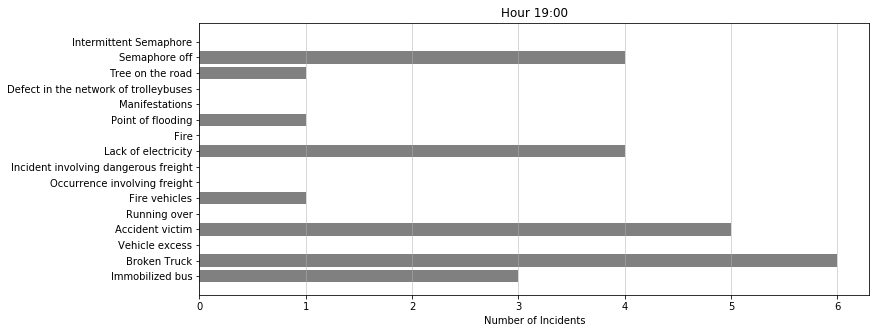

In [19]:
print("Time Options:", *dict_hours.values(), sep='\t')
plot_hour("19:00")

# Modeling and Predection

Linear Regression

In [20]:
#Data Preperation

x=[i for i in base]
x[0]="Hour"
AVG=base[x[-1]].mean()
base=base.replace(to_replace = np.nan, value =AVG) 
base.columns=x
resultColumn=base[x[-1]]
base=base.drop(x[-1],axis=1)
dummy=pd.get_dummies(base.Hour)
merge=pd.concat([base,dummy],axis=1)
base=merge.drop("Hour",axis=1)
        
#Normalization        
minmax = MinMaxScaler()
base[[i for i in base]] = minmax.fit_transform(base[[i for i in base]])


base=pd.concat([base,resultColumn],axis=1)

In [21]:
#Training and testing Split
x = base.iloc[:, :-1].values
y = base.iloc[:, -1].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size  = 4/5,shuffle=False )

In [22]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
yPrediction = linearRegressor.predict(xTest)

for i in range(27):
     print("○ Predicted Value: ","{0:.4f}".format(yPrediction[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  -4.7618 | Actual Value:  3.4000
○ Predicted Value:  4.7293 | Actual Value:  5.0000
○ Predicted Value:  6.0207 | Actual Value:  5.5000
○ Predicted Value:  4.3739 | Actual Value:  6.4000
○ Predicted Value:  2.7326 | Actual Value:  8.2000
○ Predicted Value:  2.7064 | Actual Value:  9.0000
○ Predicted Value:  6.6024 | Actual Value:  10.1000
○ Predicted Value:  6.2890 | Actual Value:  10.3000
○ Predicted Value:  7.0423 | Actual Value:  10.9000
○ Predicted Value:  8.2568 | Actual Value:  12.3000
○ Predicted Value:  8.2282 | Actual Value:  11.9000
○ Predicted Value:  7.0730 | Actual Value:  10.3000
○ Predicted Value:  7.8952 | Actual Value:  11.0000
○ Predicted Value:  8.2146 | Actual Value:  9.7000
○ Predicted Value:  8.5890 | Actual Value:  10.3000
○ Predicted Value:  11.7866 | Actual Value:  10.9000
○ Predicted Value:  10.0591 | Actual Value:  8.9000
○ Predicted Value:  10.8488 | Actual Value:  9.4000
○ Predicted Value:  11.5483 | Actual Value:  11.3000
○ Predicted Valu

In [23]:
#Error Calculation
error=0
for i in range(len(yPrediction)):
    error+=pow(yPrediction[i]-yTest[i],2)
error=error/27
print("○ MSE Error-->","{0:.4f}".format(error))

○ MSE Error--> 15.5562


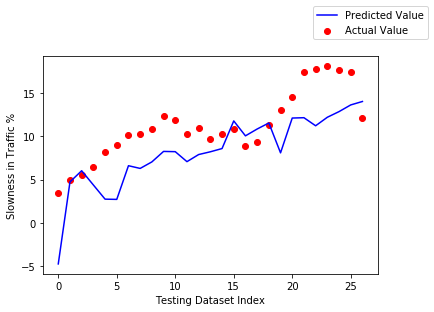

In [24]:
assume=[i for i in range(27)]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, yPrediction, color = 'blue',label="Predicted Value")
plt.ylabel("Slowness in Traffic %")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
plt.show()

Polynomial Regression

Decision Tree

In [25]:
regressor = DecisionTreeRegressor(random_state =1)
regressor.fit(xTrain, yTrain)

# Predicting a new result
y_pred = regressor.predict(xTest)

for i in range(27):
     print("○ Predicted Value: ","{0:.4f}".format(y_pred[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  4.1000 | Actual Value:  3.4000
○ Predicted Value:  5.0000 | Actual Value:  5.0000
○ Predicted Value:  5.3000 | Actual Value:  5.5000
○ Predicted Value:  5.3000 | Actual Value:  6.4000
○ Predicted Value:  7.0000 | Actual Value:  8.2000
○ Predicted Value:  7.6000 | Actual Value:  9.0000
○ Predicted Value:  7.4000 | Actual Value:  10.1000
○ Predicted Value:  6.7000 | Actual Value:  10.3000
○ Predicted Value:  6.7000 | Actual Value:  10.9000
○ Predicted Value:  7.7000 | Actual Value:  12.3000
○ Predicted Value:  8.7000 | Actual Value:  11.9000
○ Predicted Value:  8.7000 | Actual Value:  10.3000
○ Predicted Value:  8.7000 | Actual Value:  11.0000
○ Predicted Value:  5.3000 | Actual Value:  9.7000
○ Predicted Value:  5.1000 | Actual Value:  10.3000
○ Predicted Value:  5.3000 | Actual Value:  10.9000
○ Predicted Value:  9.2000 | Actual Value:  8.9000
○ Predicted Value:  5.1000 | Actual Value:  9.4000
○ Predicted Value:  9.9000 | Actual Value:  11.3000
○ Predicted Value:  1

In [26]:
error=0
for i in range(len(y_pred)):
    error+=pow(y_pred[i]-yTest[i],2)
error=error/27
print("○ MSE Error-->","{0:.4f}".format(error))

○ MSE Error--> 10.7074


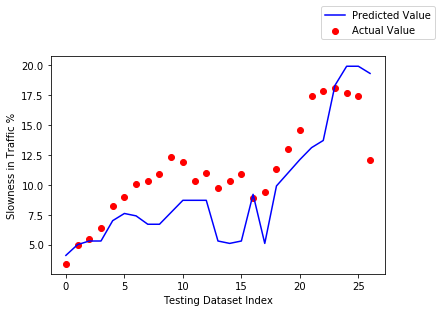

In [27]:
assume=[i for i in range(27)]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, y_pred, color = 'blue',label="Predicted Value")
plt.ylabel("Slowness in Traffic %")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
plt.show()

#Recursive Feature Elimination

In [28]:
baseData = pd.read_csv(r'C:\Users\dheer\Desktop\DS Assignment\Dataset\traffic.csv', sep=";")

In [29]:
X = base.drop('Slowness in traffic (%)', axis=1)
target = base['Slowness in traffic (%)']

colnames = X.columns

In [30]:
lr = DecisionTreeRegressor()
lr.fit(X, target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [31]:
ranks = {}

# Create a function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [32]:
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X, target)
ranks["RFE"] = [ranking(list(map(float, rfe.ranking_)), list(colnames), order=-1)]
rfe_ranks = pd.DataFrame(ranks["RFE"]).transpose()
rfe_ranks.columns = ['rfe_rank']

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [33]:

# Create a feature ranking matrix
r_df = pd.DataFrame(rfe_ranks.index)
r_df['Feature'] = pd.DataFrame(rfe_ranks.index)
r_df['rfe_rank'] = rfe_ranks['rfe_rank'].values
r_df = r_df.sort_values('rfe_rank', ascending=False)
r_df

,0,Feature,rfe_rank
0,Hour (Coded),Hour (Coded),1.00
17,1,1,0.95
11,Point of flooding,Point of flooding,0.90
21,5,5,0.86
9,Lack of electricity,Lack of electricity,0.81
18,2,2,0.76
20,4,4,0.71
2,Broken Truck,Broken Truck,0.67
1,Immobilized bus,Immobilized bus,0.62
19,3,3,0.57


C:\Users\dheer\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

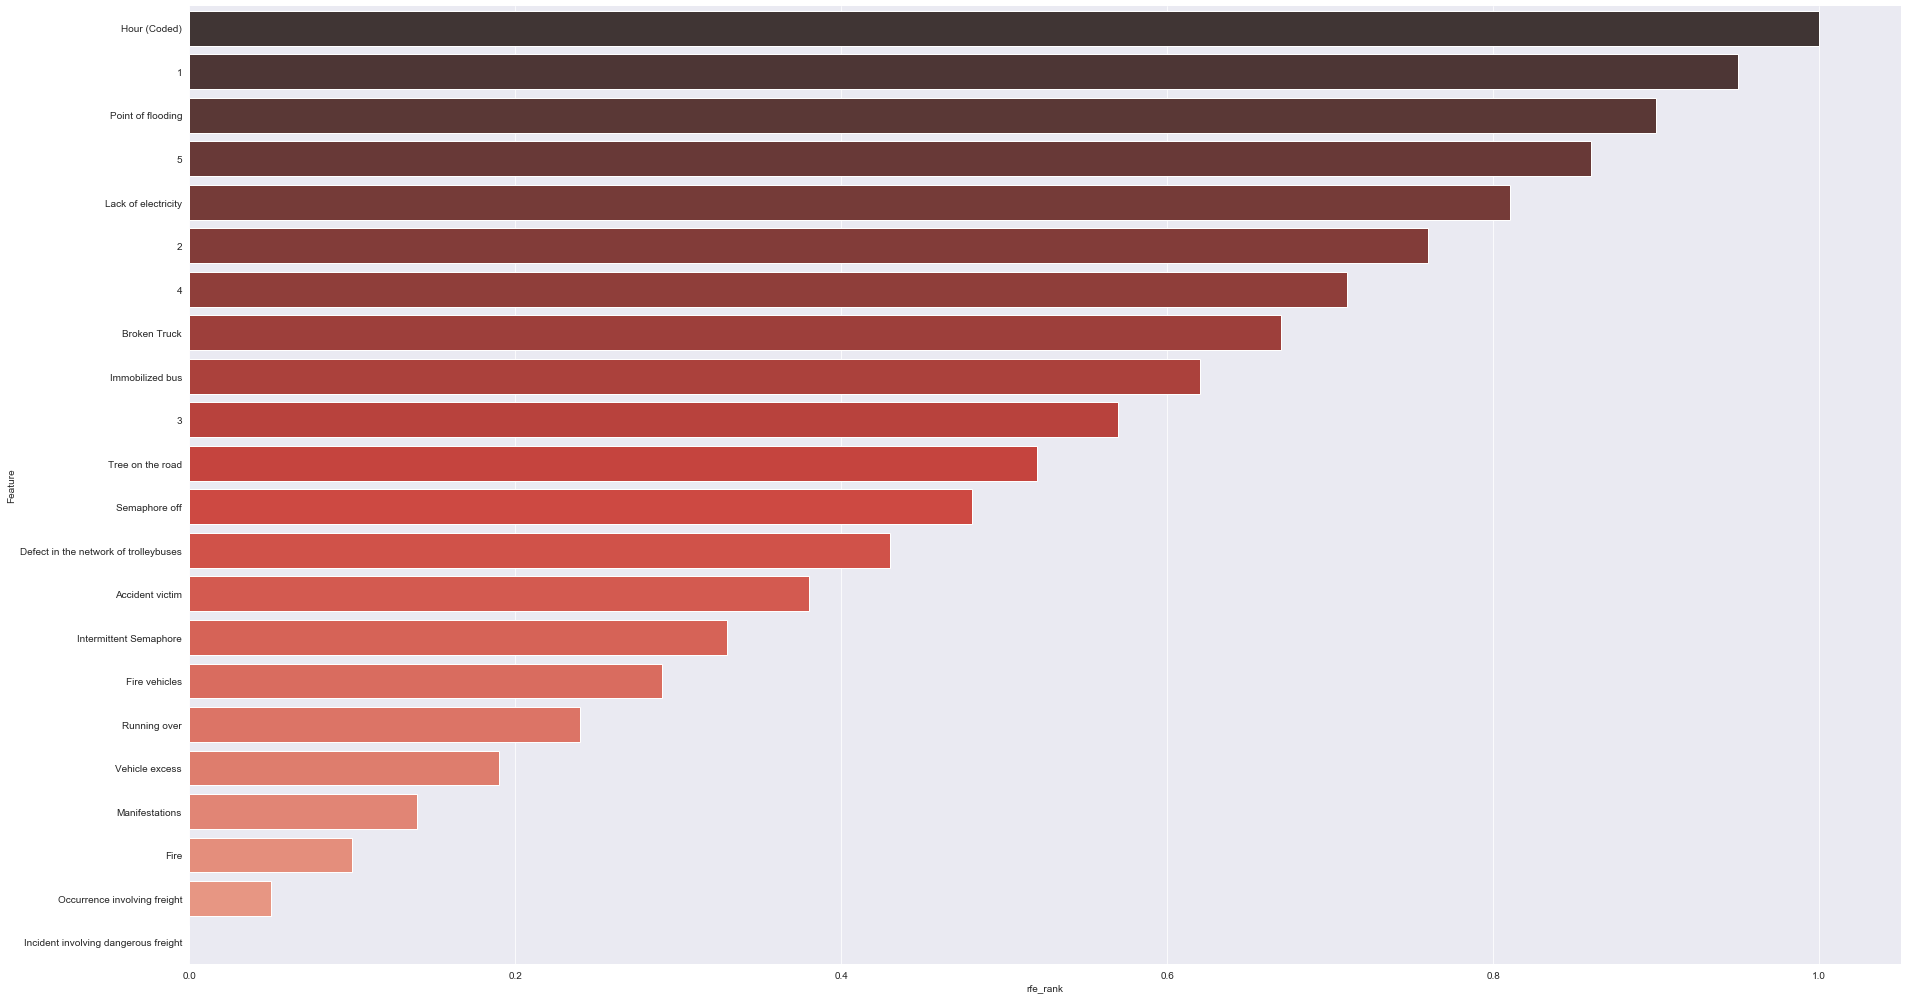

In [34]:

# Plot the contents of the feature ranking matrix

rankplot = pd.DataFrame(rfe_ranks.index)
rankplot['rfe_rank'] = r_df['rfe_rank']
rankplot['Feature'] = r_df['Feature']
rankplot = rankplot.sort_values('rfe_rank', ascending=False)


plt.clf()
sns.set_style("darkgrid")
sns.factorplot(x='rfe_rank', y='Feature', data = rankplot, kind="bar", 
               height=14, aspect=1.9, palette='Reds_d')